# Неделя 2: Практика

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Темы
1. Элементы теории вероятностей
2. Основные понятия в статистике
3. Оценивание параметров распределения
4. Визуализация данных

# Теория вероятностей

В этом разделе мы будем говорить о теории вероятностей на примере распределения Бернулли и нормального распределения.

Но перед началом:

1. Что такое случайная величина?
2. Что из себя представляет распределение случайной величины в дискретном случае?

Примеры распределений:

1. Распределение Бернулли: бросок монетки
2. Равномерное (дискретное): выигрыш в лотерею
3. Распределение Пуассона: число опозданий курьеров в день
4. Нормальное распределение: рост людей одного возраста и пола (не дискретный случай!)
5. etc

Одними из важных параметров распределений являются математическое ожидание и дисперсия.

По определению **математическое ожидание:**

$$\mathbf{E}X = \sum_i x_i \cdot p(x_i) \left(= \int xf(x)dx \right)$$

По определению **дисперсия:**

$$\mathbf{D}X = \sum_i (x_i - \mathbf{E}X)^2p(x_i) \left(= \int (x-\mathbf{E}X)^2 f(x)dx \right) = \mathbf{E}X^2 - (\mathbf{E}X)^2$$

Но поскольку часто мы не знаем, какое распределение имеют наши данные, мы будем пользоваться численными оценками этих параметров:

$$\mathbf{E}X ≃ Mean(X) = \frac{1}{n}\sum_i^n x_i$$

$$\mathbf{D}X ≃ Var(X) = \frac{1}{n}\sum_i^n(x_i - Mean(X))^2$$

Распределения, которые могут быть заданы некоторыми параметрами, называются параметрическими. Часто стараются выразить эти параметры через дисперсию и математическое ожидание, поскольку (как мы убедились) эти величины можно оценить по данным.

## Распределение Бернули
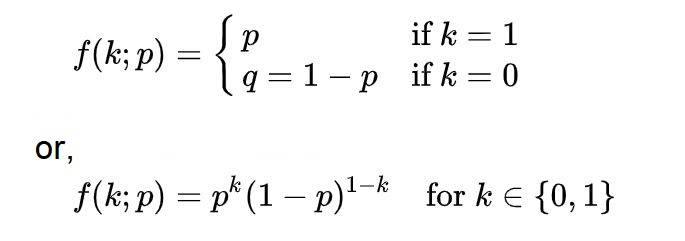

In [8]:
# Сгенериурем набор из 10 подбрасываний симметричной монетки

cases = [0, 1]

probability = 0.5 # вероятность успеха

size = 10

# Для генерации распределения Бернулли воспользуемся функцией np.random.choice(что выбираем, сколько, p=с какими вероятностями)

np.random.choice(cases, size, p=[probability, 1-probability])

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

Давайте найдем формульно, чему равны математическое ожидание и дисперсия распределения Бернулли, а затем оценим их по данным.

Выведем мат ожидание и дисперсию аналитически по определению

$$
P\{X=1\} = p
$$
$$
P\{X=0\} = 1-p = q
$$

По определению мат ожидания
$$
\mathbf{E}X = \sum_i x_i \cdot p(x_i)
$$
$$
\mathbf{E}X = 1 \cdot p + 0 \cdot (1-p) = p
$$

По определению дисперсии
$$
\mathbf{D}X = \sum_i (x_i - \mathbf{E}X)^2p(x_i)
$$
$$
\mathbf{D}X = (1-p)^2 \cdot p + (0-p)^2 \cdot q = q^2 p + p^2q = pq \cdot (p + q) = pq
$$


In [18]:
# Аналитически: E(X) = p, D(X) = pq

# На основе данных и возможностей numpy

# probability
p = 0.6
q = 1 - p
throws = 1000
outcomes = [1, 0]
x = np.random.choice(outcomes, throws, p=[p, q])

E_x_Bernoulli = np.mean(x)
D_x_Bernoulli = np.var(x)

# Сравним их

print(f"Вычисленное по конечной выборке E: {E_x_Bernoulli}")
print(f"Истинное E: {p}")
print('Difference:', E_x_Bernoulli - probability)
print()
print(f"Вычисленное по конечной выборке D: {D_x_Bernoulli}")
print(f"Истинное D: {p*q}")
print('Difference:', D_x_Bernoulli - p*q)

Вычисленное по конечной выборке E: 0.585
Истинное E: 0.6
Difference: -0.015000000000000013

Вычисленное по конечной выборке D: 0.24277500000000002
Истинное D: 0.24
Difference: 0.0027750000000000274


### Задача 1  
Бросается 4-х гранный симметричный кубик (тетраэдр все-таки?). Какое математическое ожидание будет у такого эксперимента?

In [30]:
# Аналитичекое решение
E_x_theor = 1 * 0.25 + 2 * 0.25 + 3 * 0.25 + 4 * 0.25
print(E_x_theor)

# Оценка решения по данным
size = 100000
cases = [1,2,3,4]
x = np.random.choice(cases, size, p=[0.25]*4)
E_x = np.mean(x)
E_x

2.5


2.4982

Решения слушателей

In [ ]:
probability = 0.25
size = 1000
cases = [1,2,3,4]
matOz = 0

for i in range(0,len(cases)):
    matOz += cases[i]*probability # matOz = matOz + cases[i]*probability

print(matOz)

disp = 0
for j in range(0,len(cases)): # np.var
  disp += ((cases[j]-matOz)**2)*probability

# Оценка решения по данным
print(disp)

In [31]:
p = 0.25
size = 1000
cases = [1,2,3,4]
matOz = 0

# Матожидание
for i in cases:
    matOz += i*p
print(matOz)

# Дисперсия
var = 0
for j in cases:
    var += (j - matOz)**2 * p
print(var)

2.5
1.25


### Задача 2  
Бросается 4-х гранный НЕсимметричный кубик (вероятность выпадения четного числа выше в 2 раза). Какое математическое ожидание будет в данном эксперименте?

In [38]:
# p -- ? вероятность выпадения четного числа
# m -- ? чему равная вероятность выпадения нечетного числа?

# 1 = 2p + 2m
# p/m = 2/1
# p = 2m

# 1 = 4m + 2m
# m = 1/6
# p = 2/6 = 1/3


E_x_theor = 1*1/6 + 2*1/3 + 3*1/6 + 4*1/3
print(E_x_theor)

size = 10000
cases = [1,2,3,4]
x = np.random.choice(cases, size, p=[1/6, 1/3, 1/6, 1/3])
E_x = np.mean(x)
E_x

2.6666666666666665


2.6691

Вывод для общего случая (четные/нечетные исходы):

```
1 = (len(cases)/2)*p + (len(cases)/2)*q
1 = (len(cases)/2) * (p + q)
p = 2q
1 = (len(cases)/2) * (2*q + q)
1 = (len(cases)/2)*3*q

q = 1 / ((len(cases)/2) * 3)
p = 2*q
```

In [6]:
import numpy as np
n = 4
cases = [i for i in range(1, n+1)]

q = 1 / ((len(cases)/2) * 3)
p = 2*q

print(f'p = {p}')
print(f'q = {q}')

p = 0.3333333333333333
q = 0.16666666666666666


In [51]:
E_x = 0
for j in cases:
    if j%2 == 0:
        E_x += j*p
    else:
        E_x += j*q
# print('Outcomes:', cases)
print('E_x calculated:', E_x, f'for {n} possible outcomes')

E_x calculated: 2.6666666666666665 for 4 possible outcomes


In [53]:
size = 10000

x = np.random.choice(cases, size, p=[1/6, 1/3, 1/6, 1/3])
E_x_mean = np.mean(x)
print('E_x mean:', E_x_mean, f'for 4 possible outcomes')

E_x mean: 2.655 for 4 possible outcomes


In [115]:
len(cases)/2*p + len(cases)/2*q

1.0

Задача 3*  
Проводится следующий эксперимент: 100 раз бросается монетка. 60 раз выпал орел и 40 раз выпала решка. Можно ли утверждать, что монетка НЕсимметричная?

Ответ ниже

Ответ: аппарата для этого пока у нас нет, нельзя утверждать, непонятна сила утверждения

## Непрерывные случайные величины

Перед тем как перейти к непрерывным случайным величинам:

1. Что из себя представляет распределение непрерывной случайной величины?
2. Что такое плотность случайной величины?

### Нормальное распределение

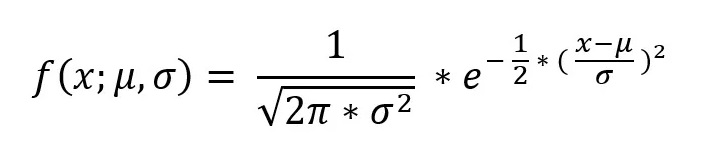

Сгенерируем выборку из 1000 чисел с ${\mu} = 10$ и ${\sigma} = 2$. Для генерации нормального распределения воспользуемся функцией `np.random.normal` (параметр ${\mu}$, параметр ${\sigma}$, размер выборки $size$)

In [119]:
mu = 10
sigmasq = 2
size = 1000

np.random.normal(mu, np.sqrt(sigmasq), size)

array([ 8.95224229, 10.24871725,  9.29073427, 10.99803235, 10.30733495,
       10.71653486,  8.97502834,  8.93114727, 10.6019951 ,  9.57841009,
       11.5801068 , 10.55370866, 10.44532196, 10.13342745,  9.61345024,
       10.84143933,  9.99263146, 11.72470184,  9.11060139, 10.18583063,
        8.96435528, 11.85716942, 10.51025597, 12.23940413,  8.7816108 ,
        9.42575033, 12.88723585, 12.26142003, 10.01749986,  9.10089857,
        9.83587569,  9.52090082, 13.33349551,  9.92994985,  8.63373322,
       11.1284621 , 10.31780302, 12.51270478, 11.94012316, 10.61606724,
       13.04015362, 11.77382416,  9.09149443, 10.86261849, 11.94415307,
        9.61373669,  7.8662011 ,  9.18162993,  9.09360628, 11.14193909,
       11.01973281, 10.54581051, 10.69662537, 10.78942129,  8.47805349,
        8.46273467,  7.73106335,  9.47945044,  9.92270009, 14.09615339,
       10.45427222,  8.27193416,  7.66229711, 10.98678554, 10.96009223,
        8.54350247,  9.64333507, 10.96788369,  7.44050891,  9.13

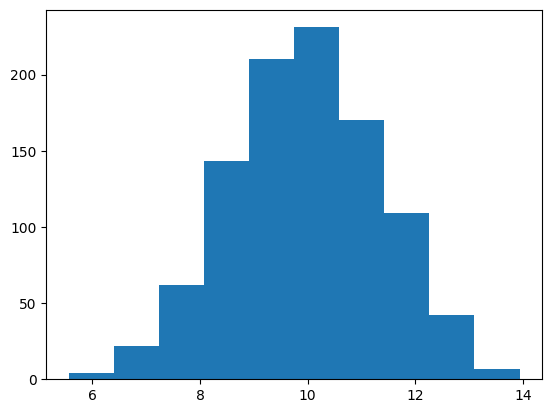

In [129]:
size = 1000
plt.hist(np.random.normal(mu, np.sqrt(sigmasq), size));

Для того, чтобы честно вывести, чему равно математическое ожидание и дисперсия нормального распределения, нужно приложить некоторые усилия, поэтому мы сначала численно оценим их, а потом попытаемся понять, как они связаны с параметрами распределения.

Посчитаем численно при помощи возможностей `numpy`:

In [59]:
size = 1000
mu = 10
sigmasq = 2
x = np.random.normal(mu, np.sqrt(sigmasq), size)

E_x_normal = np.mean(x)
D_x_normal = np.var(x)

print(E_x_normal)
print(D_x_normal)

9.958811585922712
1.9429475855396847


### Задача 3

Бросаем кубик 6-гранный. `А` - вероятность выпадения 1 или 2. `В` = `отрицание A`.

Какое у нас распределение дискретной случайной величины `X`?
```
1, P(X=1) = 1/6
2, P(X=2) = 1/6
3, P(X=3) = 1/6
4, P(X=4) = 1/6
5, P(X=5) = 1/6
6, P(X=6) = 1/6
```
```python
P(А) = P(X=1 OR X=2) = P(X=1) + P(X=2) - P(X=1 & X=2) = 1/6 + 1/6 - 0 = 1/3

P(В) = P(~A) = 1 - P(A) = 1 - 1/3 = 2/3

```

### Задача 4

Бросается 2 кубика. 
- Какая вероятность, что оба раза выпадет нечетное число? 
- Чему равно математическе ожидание суммы на кубиках?

**Решение**

**Два нечетных числа**

Вероятность выпасть нечетному числу Р(А) = 1/2.

Вероятность НЕ выпасть шестерке Р(В) = 1 - Р(А) = 1/2.

То есть шансы равновероятны. Можно посчитать по формуле: Р(А)\*Р(А)

$$
(\frac {1}{2})^2 = \frac {1}{4}
$$

**Матожидание суммы**

Две кости, обозначим случайную величину первой Х, второй - Y. Тогда матожидание выпаления количества очков одной кости вычисляется по формуле:

$$E(X) = \frac {1+2+3+4+5+6}{6} = 3.5$$

=> матожидение суммы очков на двух костях:

$$
E(X)\ +\ E(Y) = 3.5\ +\ 3.5 = 7
$$

**Решения от преподавателя**

Первый вариант решения -- по определению элементарной вероятности
```
1 1
1 2
1 3
...
6 4
6 5
6 6
```

Всего 6 * 6 = 36 исходов
3 * 3 = 9 исходов удовлетворяют нашему событию
По определнию элементарной вероятности 9/36 = 1/4


Подсказка 1
А - событие, что выпало нечетное число на кубике 1 (неявно сказано, что на втором кубике может выпасть все что угодно)
B - событие, что выпало нечетное число на кубике 2 (неявно сказано, что первом кубике может выпасть все что угодно)

Подсказка 2
Определение независимости событий: $P(A, B) = P(A) \cdot P(B)$

P(A,B) = P(A)*P(B) = (3*6)/36 * (6*3)/36 = 1/2 * 1/2 = 1/4

Покажем, что P(A|B) = P(A)  
Рассмотрим левуюу часть, `| B` сокращает наше множество исходов

```
1 1
2 1
3 1
4 1
5 1
6 1
1 3
2 3
3 3
4 3
5 3
6 3
1 5
2 5
3 5
4 5
5 5
6 5
```

Сколько здесь случаев, удовлетворяющих событию A? -- ровно половина
> P(A|B) = 9/18 = 1/2

Теперь посмотрим на правую часть. Там также нам подходит ровно половина случаев от всех
> 18 / 36 = 1/2

$P(A|B) = P(A)$  
Получается, что A и B действительно независимы.


### Задача 5

А - выпадение нечетного числа на кубике 1 (неявно, сказано что на втором кубике может выпасть все что угодно)  
B - выпадение 5-ки на кубике 2 (неявно, сказано что на первом кубике может выпасть все что угодно)

Решение спрятано ниже

$$P(A, B) = P(A) * P(B)$$

$$(\frac {3}{6} \cdot \frac {6}{6}) \cdot (1 \cdot \frac {6}{36}) = \frac {1}{2} \cdot \frac {1}{6} = \frac {1}{12}$$

### Задача 4 (хорошая)

Бросается шестигранный кубик. 
- Если выпадает четное число, то бросается монетка и к значению кубика прибавляется значение монетки (орел - 1, решка - 0)
- Если выпадает нечетное число, то бросается четырехгранный кубик и результат двух кубиков складывается.  

Найти математическое ожидание такого эксперимента

Событие AM: выпадает четное число + монетка  
Событие BK: выпадает нечетное число + кубик

**AM**
```
2 + 1   2 + 0
4 + 1   4 + 0
6 + 1   6 + 0
```

Сложить все исходы и разделить на их количество (т.к. вероятность одинакова): 

$$\frac {3+5+7+2+4+6}{6} = \frac {25}{6}$$

**BK**

```
1 + 1   3 + 1   5 + 1
1 + 2   3 + 2   5 + 2
1 + 3   3 + 3   5 + 3
1 + 4   3 + 4   5 + 4
```

Вероятности выпадения конкретных сумм, 12 возможных исходов:
```
1 + 1 = 1/18   3 + 3 = 2/18   5 + 3 = 1/18
1 + 2 = 1/18   3 + 4 = 2/18   5 + 4 = 1/18
1 + 3 = 2/18
1 + 4 = 2/18
```
Считаем:

$$
2*\frac {1}{18} + 3*\frac {1}{18} + 4*\frac {2}{18} + 5*\frac {2}{18} + 6*\frac {2}{18} + 7*\frac {2}{18} + 8*\frac {1}{18} + 9*\frac {1}{18}
$$

$$
22/18 + 22/18 * 2 = 66/18 = 22/6
$$

**Итог**: 

P(AM) = 1/2  
P(BK) = 1/2

$$
\frac {25}{6} \cdot \frac {1}{2} + \frac {22}{6} \cdot \frac {1}{2} = \frac {47}{12} = 3,91(6)
$$

In [63]:
2*(1/18) + 3*(1/18) + 4*(2/18) + 5*(2/18) + 6*(3/18) + 7*(3/18) + 8*(2/18) + 9*(2/18) + 10*(1/18) + 11*(1/18)

6.499999999999999

In [69]:
47/12

3.9166666666666665

#### Решение преподавателя

```
2 4 6 -> 2 4 6 3 5 7
1 3 5 -> 2 4 6 3 5 7 4 6 8 5 7 9
```

**Аналитически**

Вариант 1.
В зависимости от наступления того или иного события вероятность меняется. В общем-то для таких случаев и придумали условную вероятность.

$S = X + M$, $M$ - добавка к $X$

P(M=1) = ?  
P(M=2) = ?

$$P(A|B) = \frac {P(AB)}{P(B)}$$ 
$$ --> P(AB) = P(A|B) * P(B)$$

Например, для  
```
P(S = 9) = P(X=5, M=4) = P(M=4 | X=5) * P(X=5) = 1/4 * 1/6 = 1/24
P(S = 7) = P(7 = X+M) = P(M=1 | X=6)*P(X=6) + P(M=4|X=3)*P(X=3) + P(M=2 | X=5) *P(X=5) = ...
```

по формуле полной вероятности
```
P(M=9) = 1/2 * 1/2 = 1/4
P(M=1) = P(M=1 | X=1) * P(X=1) * P(M=1 | X=2) *P(X=2) + P(M=1 | X=3) * P(X=3) + P(M=1 | X=4) * p(x=4) + P(M=1 | X=5) * p(x=5) + P(M=1 | X=6) * p(x=6)=
= 1/4 * 1/6 + 1/2 * 1/6 + 1/4*1/6 + 1/2 * 1/6 + 1/4 * 1/6 + 1/2 * 1/6 = 1/24 + 1/12 + 1/24 + 1/12 + 1/124 + 1/12 = 3/24 + 3/12 = 
= 1/8 + 1/4 = 3/8
```

будет ли сумма равна 1? 

$1/4 + 1/8 + 1/8 + 1/8 + 3/8 = 8/8 = 1$

видно, что, например, P(M=1 | X=5) != P(M=1)


**Вариант 2.**

$$S = f(X,Y,Z) = X + g(X) * Y + (1-g(X)) * Z$$

где
- $g(X)$ = 1, $X$ - чет
- $g(X)$ = 0, $X$ - неч 

```
X Y Z    S
1 1 1 -> 2 
1 0 1 -> 2
1 1 2 -> 3
1 0 2 -> 3
1 1 3 -> 4
1 0 3 -> 4
1 1 4 -> 5
1 0 4 -> 5
...
2 0 1 -> 2
2 0 2 -> 2
2 0 3 -> 2
2 0 4 -> 2
...
5 1 4 -> 9
5 0 4 -> 9
...
6 1 4 -> 7
6 0 4 -> 6
```

Всего эл. исходов  6*2*4 = 48  
Видно, что например, для 9, нам удовлетворяет 2 исхода --> P(S=9) = 2 / 48 = 1/24

Итого  
```
P(S=2) = (4 + 2) / 48 = 6/48 = 1/8
P(S=3) = (4 + 2) / 48 = 6/48 = 1/8
P(S=4) = (4 + 4) / 48 = 8/48 = 1/6
P(S=5) = (4 + 4) / 48 = 8/48 = 1/6
P(S=6) = (4 + 4) / 48 = 8/48 = 1/6
P(S=7) = (4 + 4) / 48 = 8/48 = 1/6
P(S=8) = (0 + 2) / 48 = 1/24
P(S=9) = (0 + 2) / 48 = 1/24
```

На основе данных:

In [74]:
import numpy as np
from matplotlib import pyplot as plt

size = 10000
x = np.random.choice([1,2,3,4,5,6], size, p=[1/6] * 6)
y = np.random.choice([0,1], size, p=[1/2,1/2])
z = np.random.choice([1,2,3,4], size, p=[1/4]*4)

res = np.array([x[i] + y[i] if x[i] % 2 == 0 else x[i] + z[i] for i in range(len(x))])
res

# можно переписать, формирование res вот так
#res = []
#for i in range(len(x)):
#  if x[i] % 2 == 0:
#    res.append(x[i] + y[i])
#  else:
#    res.append(x[i] + z[i])

array([5, 4, 7, ..., 5, 9, 6])

In [81]:
# counts = {
#     2: 0,
#     4: 0,
#     6: 0,
#     3: 0,
#     5: 0,
#     7: 0,
#     8: 0,
#     9: 0,
# }

# for elem in res:
#     counts[elem] += 1
# counts

In [84]:
counts = dict()
for elem in res:
    counts[elem] = counts.get(elem, 0) + 1
    
sorted(counts.items())

[(2, 1257),
 (3, 1260),
 (4, 1662),
 (5, 1661),
 (6, 1705),
 (7, 1637),
 (8, 408),
 (9, 410)]

In [85]:
# np.unique(res, return_counts=True) --> 
# <массив с уникальными значениями>, <массив встречаемости каждого значения>

ps = {k: v/size for k,v in counts.items()}
for k in sorted(ps):
    print(f"Вероятность k={k}: {ps[k]}")

print()
print(f"Мат ожидание по выборке: {res.mean()}")


Вероятность k=2: 0.1257
Вероятность k=3: 0.126
Вероятность k=4: 0.1662
Вероятность k=5: 0.1661
Вероятность k=6: 0.1705
Вероятность k=7: 0.1637
Вероятность k=8: 0.0408
Вероятность k=9: 0.041

Мат ожидание по выборке: 4.989


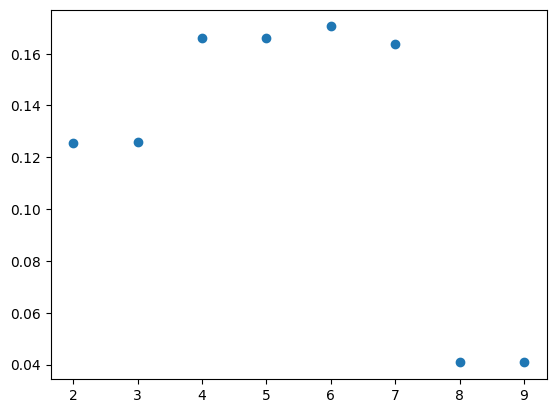

In [90]:
plt.scatter(ps.keys(), ps.values());

In [96]:
import numpy as np

# A1 - бросили кубик D6, выпало чётное число => [2, 4, 6]
# A2 - бросили кубик D6, выпало нечётное число => [1, 3, 5]
# B - бросили монетку D2, выпало заданноое число => [0, 1]
# C - бросили кубик D4, выпало заданное число => [1, 2, 3, 4]

N_A1 = 3
N_A2 = 3
N_B = 2
N_C = 4

P_A1 = N_A1 / (N_A1 + N_A2)
P_A2 = N_A2 / (N_A1 + N_A2)

N_A1B = N_A1 * N_B
N_A2C = N_A2 * N_C

P_BlA1 = 1 / N_A1B
P_ClA2 = 1 / N_A2C

P_A1B = P_BlA1 * P_A1
P_A2C = P_ClA2 * P_A2

cases_A1B = np.array([2, 4, 6, 3, 5, 7])
cases_A2C = np.array([2, 4, 6, 3, 5, 7, 4, 6, 8, 5, 7, 9])

EXT = (cases_A1B * P_A1B).sum() + (cases_A2C * P_A2C).sum()
EXT

5.0

In [97]:
cases = [2, 4, 6, 3, 5, 7, 2, 4, 6, 3, 5, 7, 4, 6, 8, 5, 7, 9]

In [99]:
x = np.random.choice(cases, size, p=[1/12,1/12, 1/12, 1/12, 1/12, 1/12, 1/24,  1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24 ])
x

array([3, 9, 7, ..., 7, 4, 6])

# Основные понятия в статистике

## Выборка

1. Что такое выборка?
2. Какая выборка называется репрезентативной?

Предположим, что мы провели опрос среди наших пользователей, которые оценили свою удовлетворенность нашим сервисом (от 1 до 10). Пусть сервисом пользуется 1 млн человек. 

Если наше приложение фунционирует хорошо, то какие оценки вы ожидаете увидеть в ВЫБОРКЕ? Ближе к 10

А как стоит относится к данным, которые сильно на ваши ожидания не похожи? Например смещены сильно вниз?

- скептически
- например, в данных могут быть ошибки
- могут быть выбросы
- выборка недостаточно репрезентативна
- может мы просто опросили мало людей

Каким образом мы можем развеять свои сомнения о том, что неожиданный результат это случайность?

- увеличить количество опросов, увеличить количество респондентов
- Построить доверительный интервал для оценки, чтобы понять степень нашей уверенности

Напомним, что такое математическое ожидание и дисперсия, и как мы можем оценить эти величины, если у нас есть только измеренные данные:

**Математическое ожидание:**

$$\mathbf{E}X = \sum_i x_i \cdot p(x_i) \left(= \int xf(x)dx \right) \\≃ Mean(X) = \frac{1}{n}\sum_i^n x_i$$

**Дисперсия:**

$$\mathbf{D}X = \sum_i (x_i - \mathbf{E}X)^2x_i \left(= \int (x-\mathbf{E}X)^2 f(x)dx \right) = \mathbf{E}X^2 - (\mathbf{E}X)^2 \\≃ Var(X) = \frac{1}{n}\sum_i^n(x_i - Mean(X))^2$$

## Правило $3\sigma$

Важным эмпирическим фактом является правило $3\sigma$. Остановимся на нем подробнее, поскольку в нем лежит ключ к пониманию дальнейших тем.

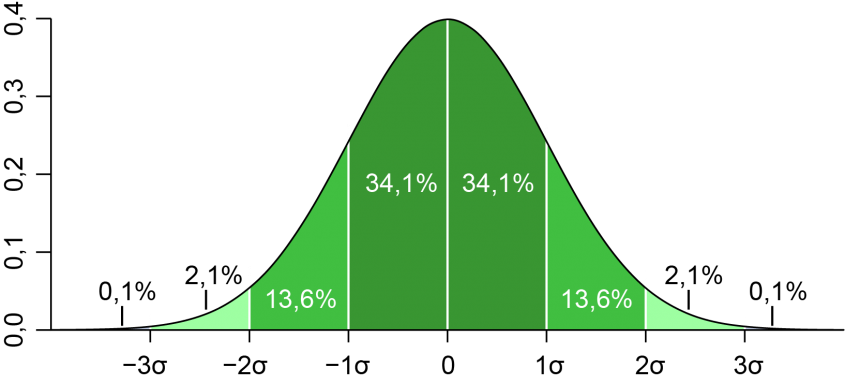

In [91]:
from scipy import stats

In [94]:
n01 = stats.norm(0, 1)

n01.ppf(0.975)

1.959963984540054

In [95]:
n01.ppf(0.9985)

2.9677379253417944

## Медиана, квантиль, мода

Создадим выборку размера 100 из значений от 1 до 10

In [128]:
x = np.random.choice([x for x in range(1, 11)], size=1000, p=[1/10]*10)
# x

Чему будет равна медиана такой выборки? Найдем ее при помощи numpy

In [118]:
print('Медиана', np.median(x))

Медиана 5.0


Чему будет равен 0.25 квантиль? Найдем его при момощи фунции `numpy` 

`np.quantile(массив, какой квантиль)`

In [119]:
print(f'Квантиль 0.1:', np.quantile(x, 0.25))

Квантиль 0.1: 3.0


Что такое мода и как ее найти?

In [139]:
def mode(x):
    
    # counting frequency of elements
    counts = {}
    for elem in x:
        counts[elem] = counts.get(elem, 0) + 1
    print(sorted(counts.items()))
   
    # searching for the biggest frequency number
    maximum = None
    for v in counts.values():
        if maximum is None or v > maximum:
            maximum = v
    print(maximum)
    
    # extracting mode elements
    modes = []
    for k, v in counts.items():
        if v == maximum:
            modes.append(k)
    
    return modes


print('Мода:', mode(x))

[(1, 109), (2, 99), (3, 89), (4, 109), (5, 108), (6, 94), (7, 99), (8, 98), (9, 98), (10, 97)]
109
Мода: [1, 4]


In [146]:
uq_, cnts = np.unique(x, return_counts=True)
print(uq_)
print(cnts)

uq_[np.argmax(cnts)]

[ 1  2  3  4  5  6  7  8  9 10]
[109  99  89 109 108  94  99  98  98  97]


1

# Оценивание параметров

## Точечное оценивание

На самом деле мы это уже делали, просто еще не знали такого умного слова! Идея проста -- давайте оценим параметры распределения при помощи величин, которые мы можем посчитать (оценить) на данных (почти всегда это математическое ожидание и дисперсия).

### Параметр распределения Пуассона

Давайте оценим параметр распределения Пуассона:

$$p(k) = \frac{\lambda^k}{k!}e^{-\lambda}$$

Создадам выборку из распределения Пуассона `np.random.poisson(lambda, размер выборки)`

In [148]:
x = np.random.poisson(2, 1000)

Чему равна дисперсия и математическое ожидание распределения Пуассона?

лямбда и лямбда

Давайте воспользуемся этим знанием, чтобы определить параметр

In [150]:
print('Мат ожидание: ', {x.mean()})
print('Дисперсия: ', {x.var()})

Мат ожидание:  {1.889}
Дисперсия:  {1.834679}


А сколько бы нам хватило данных, чтобы оценить параметр?

Давайте посмотрим что такое интервальное оценивание.

## Интервальное оценивание

В предыдущем пункте мы столкнулись с проблемой, что мы лишь оцениваем параметр распределения, а не находим его точное значение.

Но как понять хорошо ли мы его оценили? Может быть нам нужно больше данных? Может быть данные у нас сильно противоречивые?

Тут нам на помощь приходит интервальное оценивание. **Это задача со звездочкой и об этом вы подробнее познакомитесь на профильном модуле.**

А сейчас мы лишь совсем кратко коснемся этой проблемы в самом простом случае. 

Нам на помощь придет Центральная Предельная Теорема/

### Центральная Предельная Теорема

$$
\frac{\sum X_i - n\mathbf{E}X}{\sqrt{n \mathbf{DX}}} → N(0,1)
$$

Для распределения Пуассона это будет иметь вид:

$$
\sqrt{n}\frac{\overline{X} - \lambda}{\sqrt{\lambda}} → N(0,1)
$$

Нам нужно задать квантиль, который будет показывать, где у нас должны находиться данные вероятностно. ($ɛ = 0.05$)

И нужно в следующем выражении получить неравенство на интересующий нас параметр:

$$
P\left(-q_{(1-ɛ/2)} < \sqrt{n}\frac{\overline{X} - \lambda}{\sqrt{\lambda}} < q_{(1-ɛ/2)}\right) = 1 - ɛ
$$

Опустим все математические выкладки и просто посмотрим на то, чему равен доверительный интервал

$$
\left( \overline{X} - \frac{q_{(1-ɛ/2)}\sqrt{\overline{X}}}{\sqrt{n}}, \overline{X} + \frac{q_{(1-ɛ/2)}\sqrt{\overline{X}}}{\sqrt{n}} \right)
$$

Сгенерируем такую же выборку, что и в прошлом пункте

In [152]:
N = 200
lambda_ = 2
x = np.random.poisson(lambda_, N)

# alpha = 0.05
# n01 = stats.norm(0,1)
# print(n01.ppf(1-alpha/2))

Посчитаем по данным доверительный интервал

In [153]:
print(f"Левая граница интервала: {x.mean() - 2*np.sqrt(x.mean())/np.sqrt(N)}")
print(f"Правая граница интервала: {x.mean() + 2*np.sqrt(x.mean())/np.sqrt(N)}")

Левая граница интервала: 1.890305105095413
Правая граница интервала: 2.2996948949045874


А если данных будет больше/меньше?

Посмотрим на формулу!

# Визуализация

## Matplotlib
[Куча примеров](https://matplotlib.org/stable/gallery/index.html) построения графиков.

*Disclaimer*

На самом деле вы можете строить графики в любой удобной для вас программе, но `matplotlib` хотя и сложнее того же `excel`, дает большую гибкость, изложение становится более плавным (например, как в этом ноутбуке, текст подкрепляется графиками и кодом), а также есть возможность визуализировать наборы данных такого объема, с которыми `excel` в принципе не справится.


In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

## Отрисовка графика `plt.plot()`
Сгенерируем значения синуса на отрезке от $0$ до $3{\pi}$.

Обратите внимание, что функция `plt.plot` принимает минимум 2 аргумента: это набор данных для оси `x` и набор данных для оси `y`. Получается набор пар вида:

`(x1,y1), (x2,y2), ... , (xn,yn)`, который и отображает функция `plt.plot`. 

`plt.plot` соединяет все наши точки линией, чем больше точек, тем плавнее получается линия.

Таким образом размерности `x` и `y` должны совпадать.

x is [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]
y is [ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.982

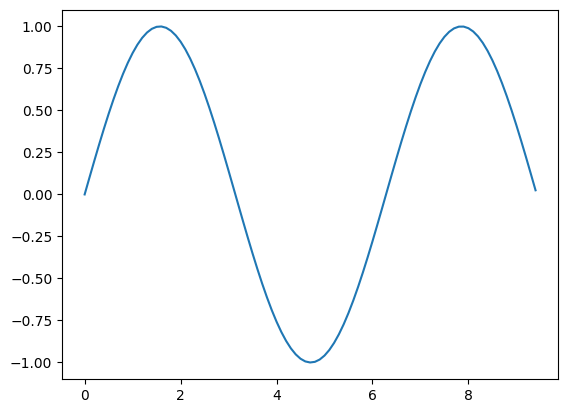

In [155]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
print("x is {}".format(x))
print("y is {}".format(y))

plt.plot(x, y)

Стиль, когда мы оперируем глобальным объектом `plt` ("рисовалка"), лишь меняя то, в какой клетке этот объект сейчас производит отрисовку, очень похож на стиль из `Matlab`. Есть и альтернативный вариант "объектный", когда мы явно оперируем всей "фигурой" и "осями".

В нашем случае `plt.figure` указывает на объект, принимающий такие свойства, как размер фигуры (`figsize`) или цвет фона (`facecolor`).

[Полный список параметров.](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html)

Помимо этого в объекте `title` доступны и другие методы, например, мы можем выставить графику заголовок с помощью `plt.title`, а также подписать оси с помощью `plt.xlabel` и `plt.ylabel`. Все это, является хорошим тоном при построении графиков.

### Заголовок и подпись осей

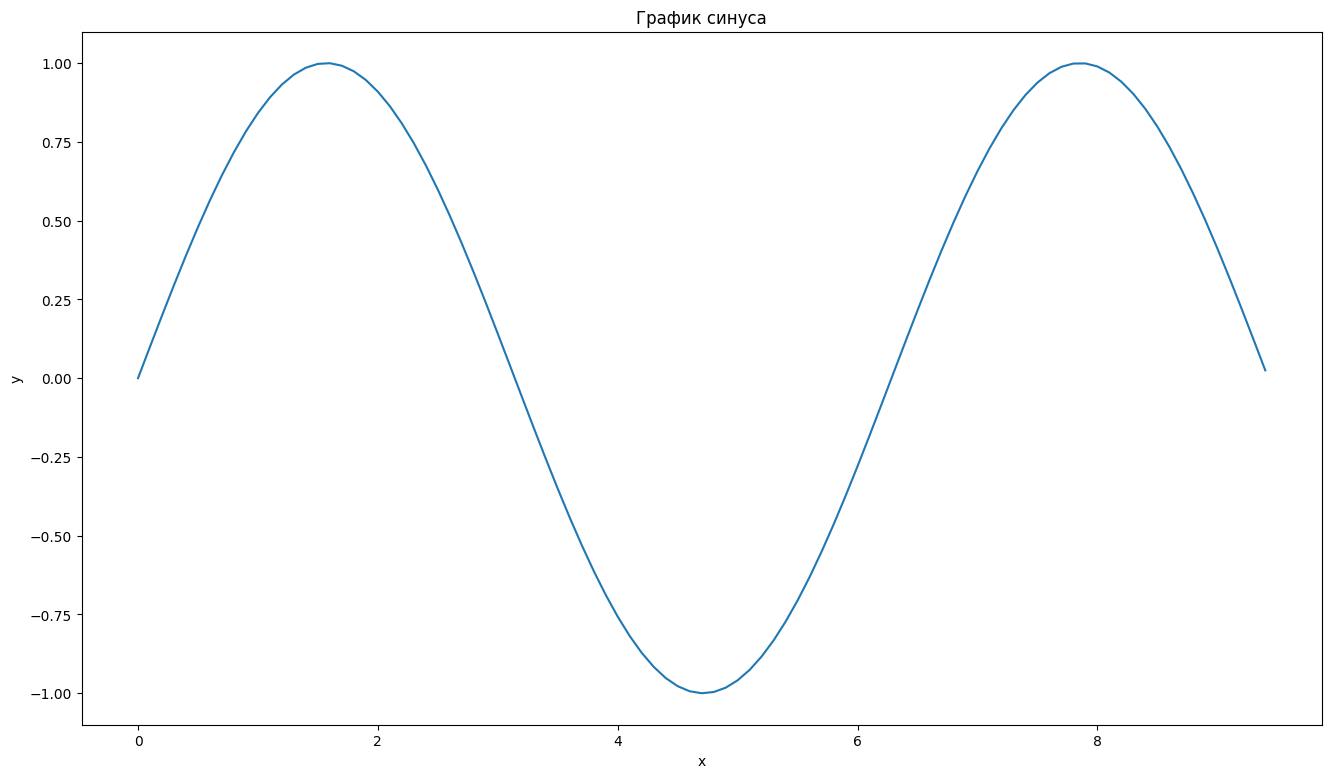

In [157]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x) # поэлементное вычисление значений функции синус

plt.figure(figsize=(16,9)) # ширина и высота в дюймах

plt.plot(x, y)
plt.title("График синуса")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Несколько графиков одновременно

Вызывая несколько раз функцию `plt.plot`, мы будем добавлять графики на полотно.

С помощью `plt.legend` мы можем указать легенду для наших графиков.

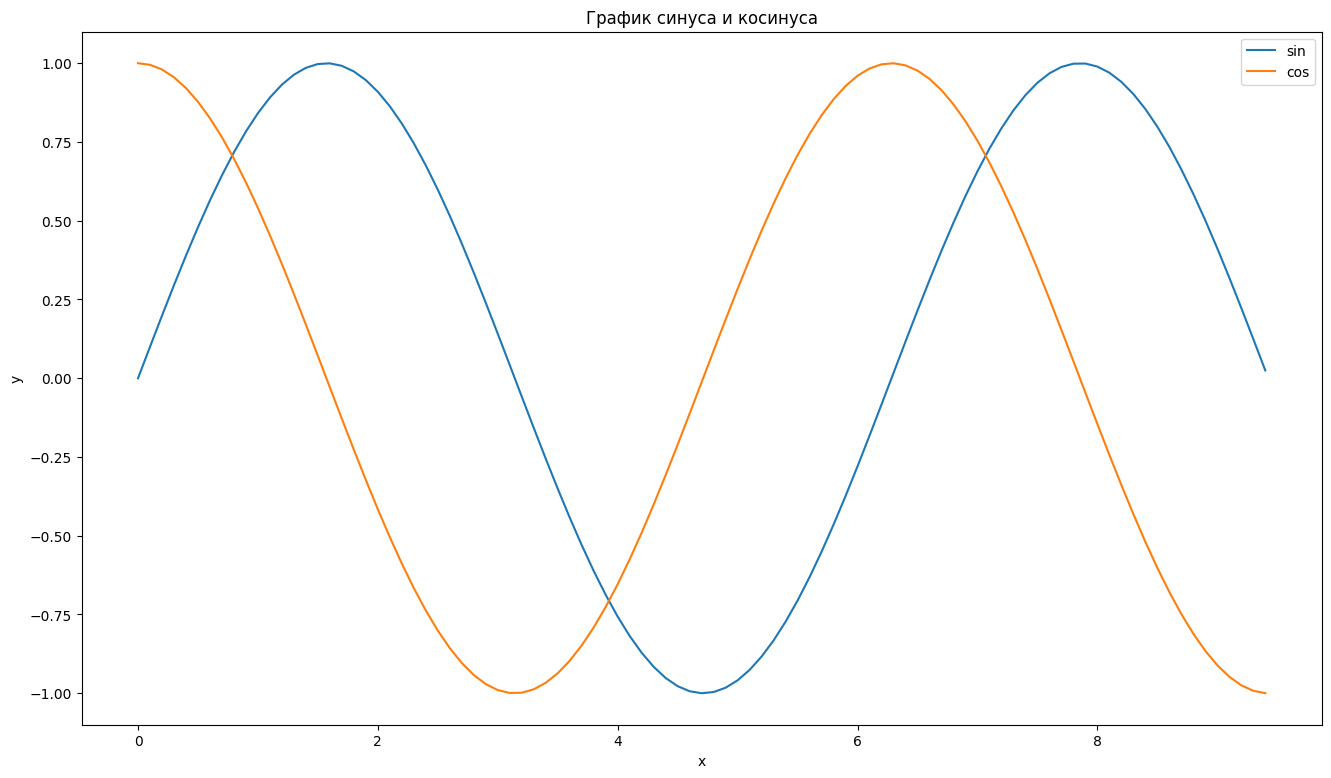

In [159]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(['sin', 'cos'])

plt.show()

### Добавление текста

Мы также можем отобразить текст в произвольном месте нашего графика. Для этого в `plt.text` передаем координату `x` и координату `y` левого верхнего угла блока с нашим текстом, а затем указываем сам текст и свойства для отображения текста.

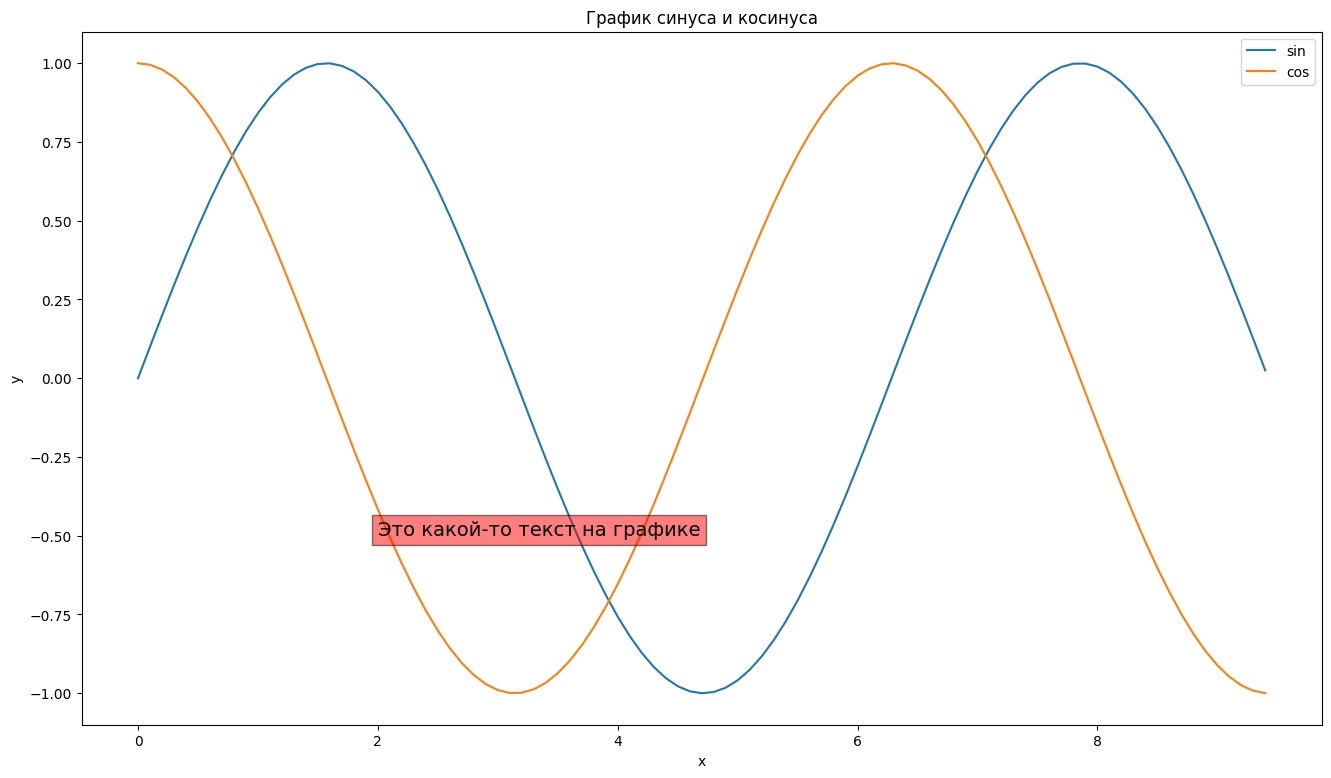

In [160]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])

plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5), fontsize=14)

plt.show()

### Изменение стиля линий

Любопытная опция "стиль линии" `linestyle` для `plt.plot`

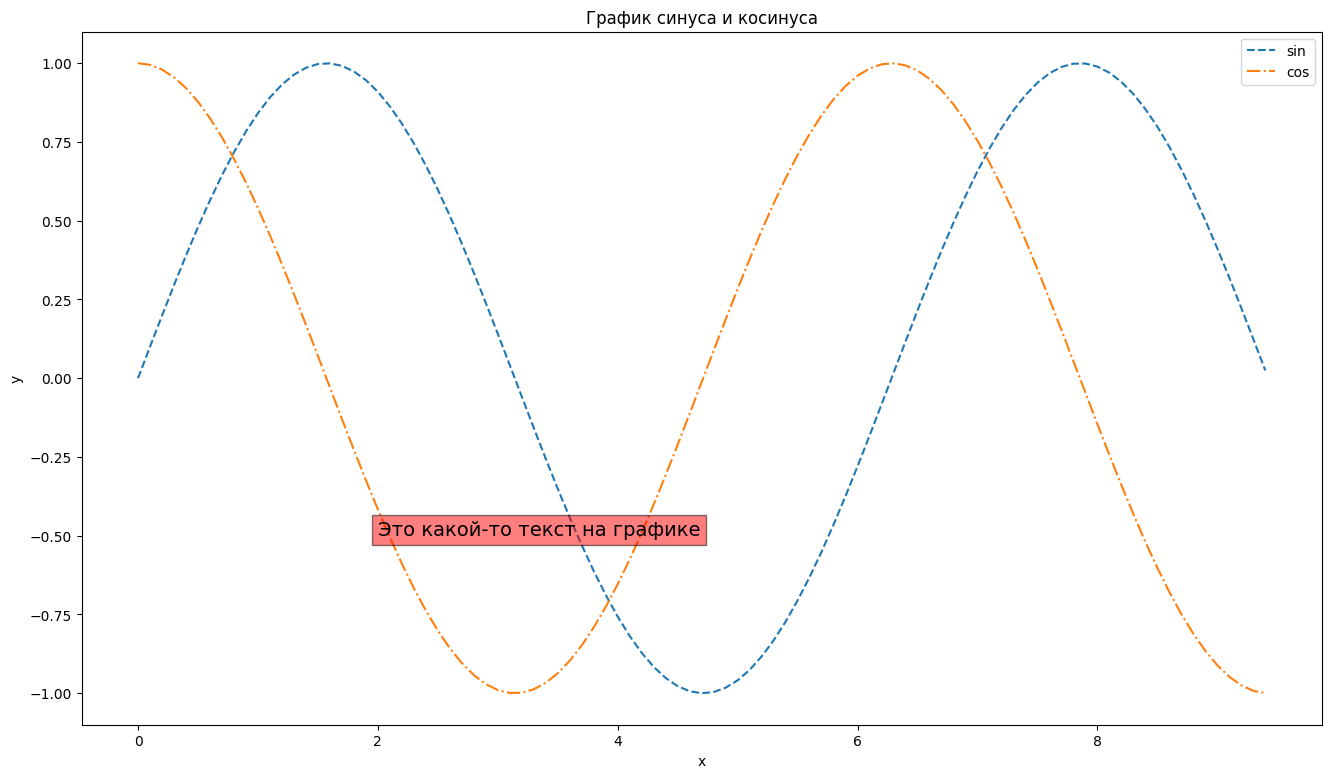

In [161]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))

plt.plot(x, y_sin, linestyle='--')
plt.plot(x, y_cos, linestyle='dashdot')

plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])
plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5), fontsize=14)
plt.show()

Можно также поменять толщину линии с помощью `linewidth` и ее прозрачность с помощью `alpha`. Прозрачность доступна и для других функций для отрисовки. Эта опция полезна тогда, когда у вас происходит существенное наложение одного графика на другой.

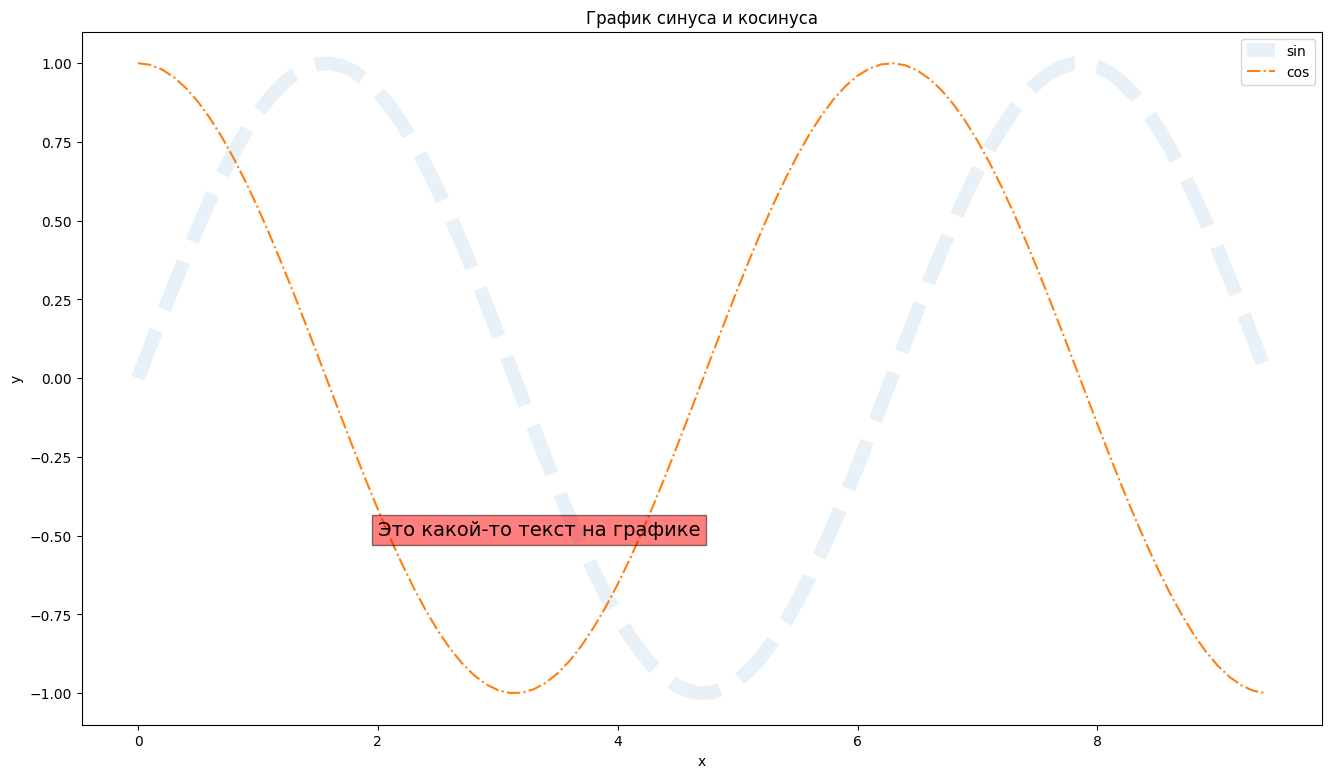

In [166]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))

plt.plot(x, y_sin, linestyle='--', linewidth=10, alpha=0.1)

plt.plot(x, y_cos, linestyle='dashdot')
plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])
plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5), fontsize=14)
plt.show()

Полный набор опций для `plt.plot()` вы можете найти [здесь](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html).

## `plt.scatter`

Рассмотрим другие функции для отрисовки. 

Например, `plt.scatter` также принимает на вход список `x` и `y`, но не соединяет точки друг с другом.

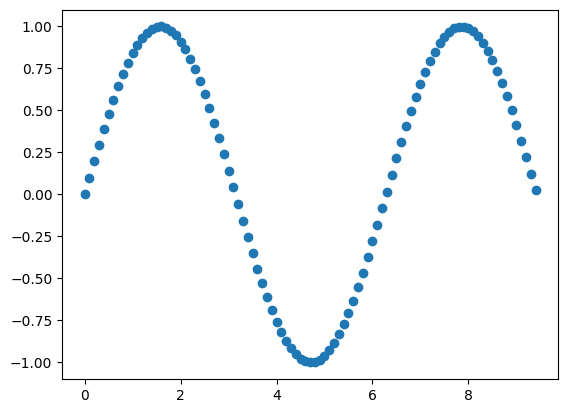

In [168]:
plt.scatter(x, y_sin);

Мы можем, например, менять форму точки

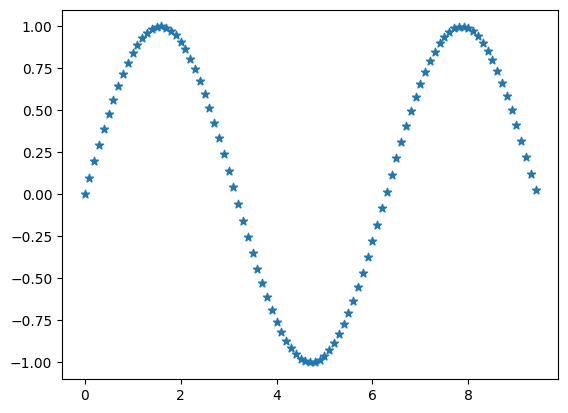

In [183]:
plt.scatter(x, y_sin, marker='*');

Если мы передадим в опции `s` список такого же размера, что `x` и `y`, то у нас будет меняться размер точек в соответствии с тем, который мы укажем.

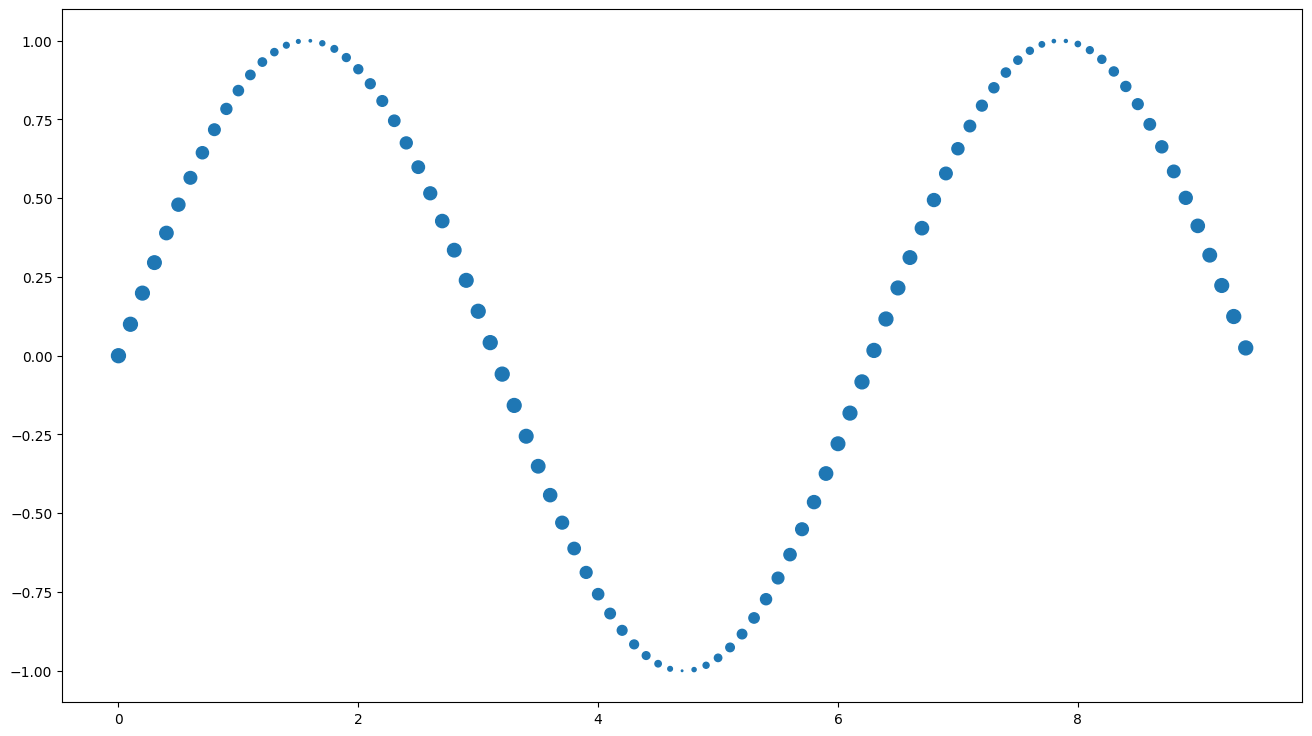

In [189]:
plt.figure(figsize=(16,9))
plt.scatter(x, y_sin, s=np.abs(y_cos)*100);

Аналогично, мы можем менять цвет точек с помощью параметра `c`:

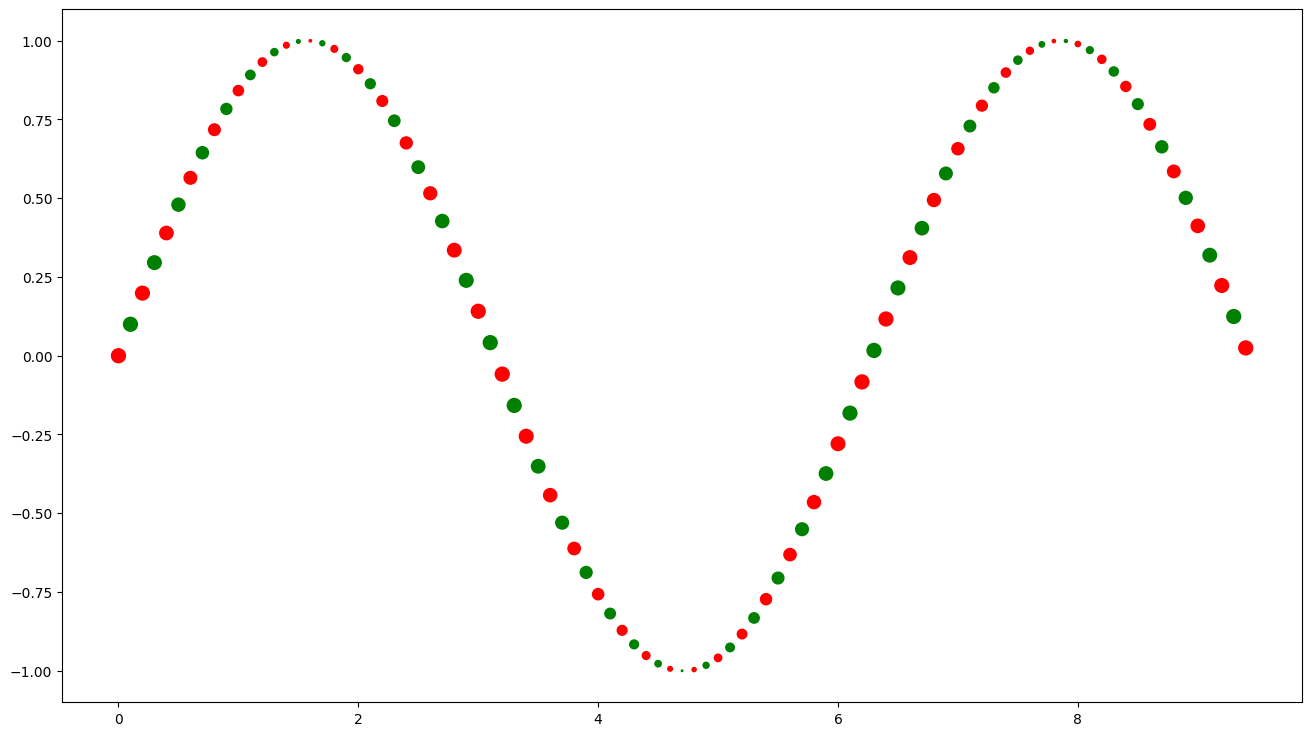

In [191]:
plt.figure(figsize=(16,9))
colors_glossary = ['red', 'green']
colors = [colors_glossary[i % 2] for i in range(x.shape[0])]
plt.scatter(x, y_sin, s=np.abs(y_cos)*100, c=colors)

## `plt.bar`

`plt.bar` отображает столбчатую диаграмму

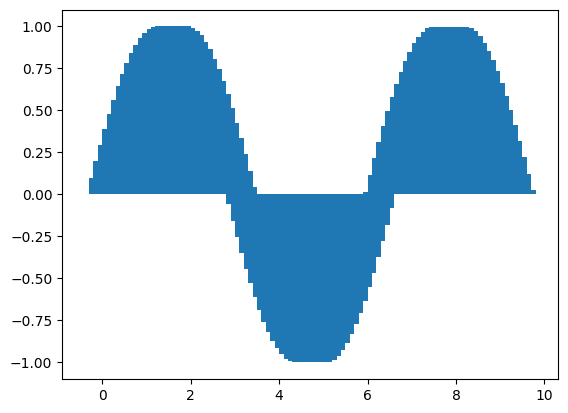

In [193]:
plt.bar(x, y_sin);

## `plt.hist`

`plt.hist` принимает всего один список на вход и отрисовывает частоту встречаемости значений в списке по инетрвалам (бакетам или бинам).

Параметр `bins` регулирует число столбиков:

(array([15.,  6.,  6.,  4., 12., 10., 14., 28.]),
 array([-9.99923258e-01, -7.49986150e-01, -5.00049042e-01, -2.50111935e-01,
        -1.74827261e-04,  2.49762280e-01,  4.99699388e-01,  7.49636495e-01,
         9.99573603e-01]),
 <BarContainer object of 8 artists>)

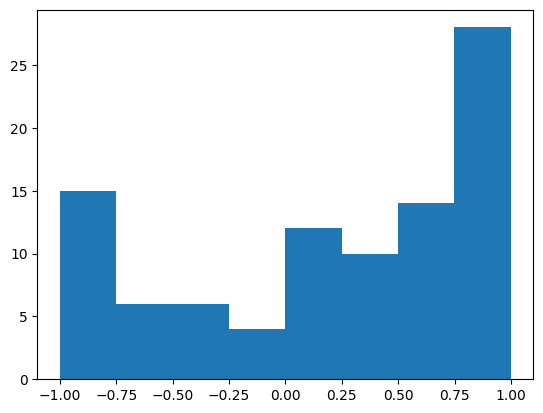

In [198]:
plt.hist(y_sin, bins='auto')

Если мы передадим параметр `density=True`, то получим **нормированную гистограмму**, то есть некоторую оценку плотности вероятности встречаемости значений нашего списка. Таким образом **"площадь под графиком"** будет равна 1. 

(array([0.63173787, 0.25269515, 0.25269515, 0.16846343, 0.5053903 ,
        0.42115858, 0.58962202, 1.17924403]),
 array([-9.99923258e-01, -7.49986150e-01, -5.00049042e-01, -2.50111935e-01,
        -1.74827261e-04,  2.49762280e-01,  4.99699388e-01,  7.49636495e-01,
         9.99573603e-01]),
 <BarContainer object of 8 artists>)

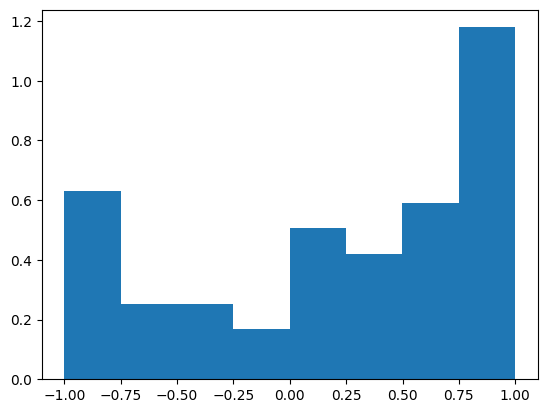

In [199]:
plt.hist(y_sin, bins='auto', density=True)

Вы можете найти возможные параметры в документации:
1. [plt.scatter](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html)
2. [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)
3. [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)

## Несколько пар осей 

С помощью объекта `plt` мы можем рисовать несколько пар осей на одном "полотне".

`plt.subplot` принимает:
- первым параметром кол-во строк, 
- вторым кол-во столбцов, 
- последний параметр устанаваливает ту пару осей, с которой мы работаем сейчас.

Рекомендую потренироваться с этим примером самостоятельно.

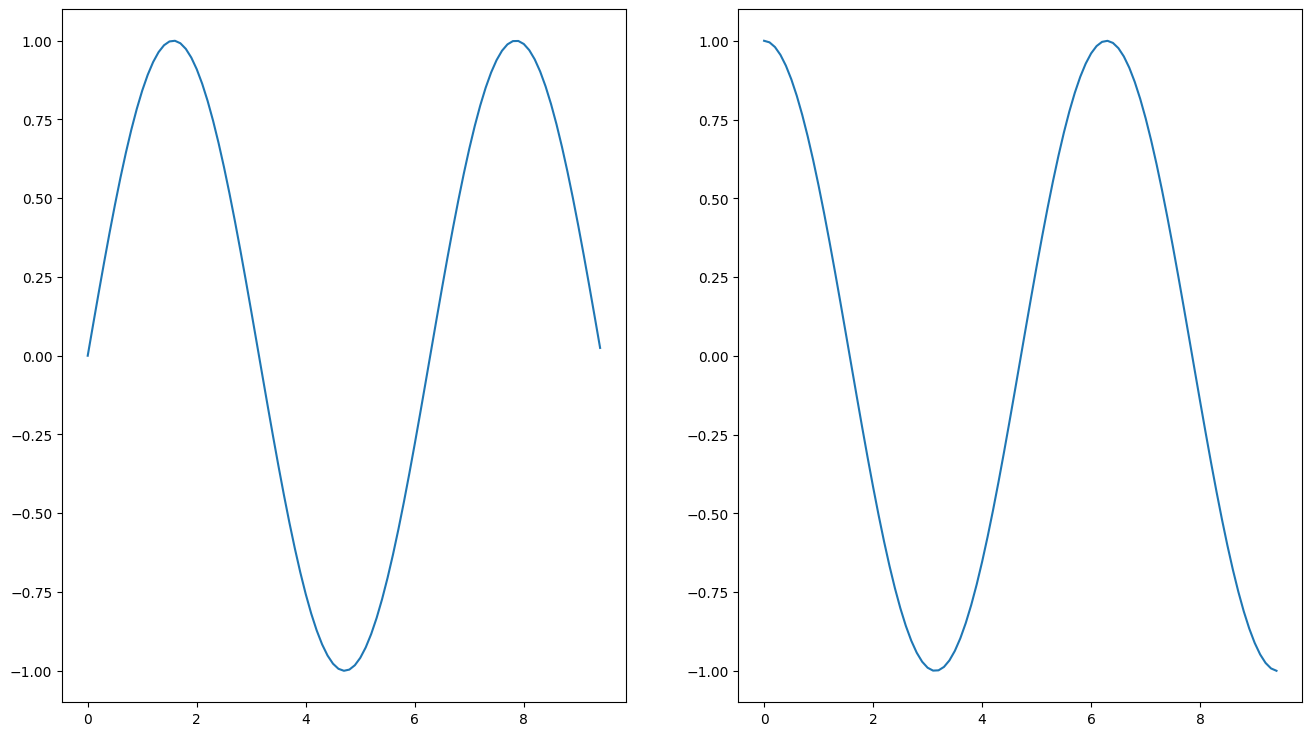

In [235]:
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)  # с этого момента рисуем на паре осей 1

plt.plot(x, y_sin)

plt.subplot(1,2,2) # с этого момента рисуем на паре осей 2

plt.plot(x, y_cos)

plt.show()

## Seaborn
Расширение над `matplotlib`. Добавляет полезных графиков, которые довольно симпатично выглядят.

[Полезный материал по seaborn](https://nagornyy.me/courses/data-science/intro-to-seaborn/)

In [236]:
import seaborn as sns

### Пример
Делаем одно и то же только с `matplotlib` и с `seaborn`

Пригодится в будущем: [три способа загрузить данные в google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

iris.csv: https://drive.google.com/file/d/1UC8DzBnWWbtmMGl0cqRDJuLLBHygJNmM/view?usp=sharing


In [237]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [258]:
import pandas as pd # немного забегаем вперед
iris = pd.read_csv('iris.csv', header='infer')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [284]:
# get correlation matrix
corr = iris.corr(numeric_only=True)
corr

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


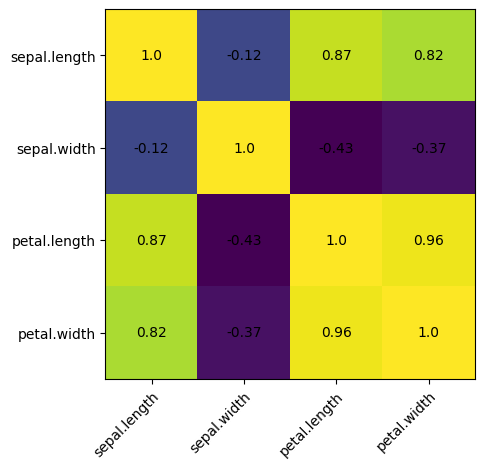

In [291]:
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

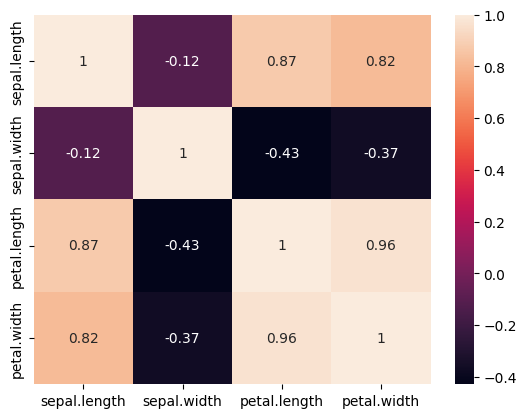

In [295]:
sns.heatmap(corr, annot=True);

In [296]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Визуализация распределений метрических переменных

*   displot
*   jointplot
*   rugplot
*   kdeplot

#### `displot`

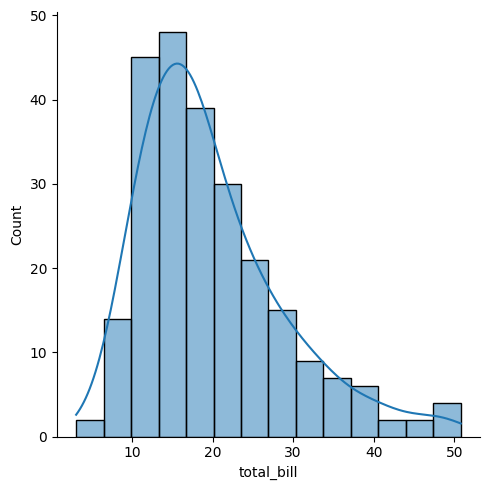

In [306]:
sns.displot(tips['total_bill'], kde=True);

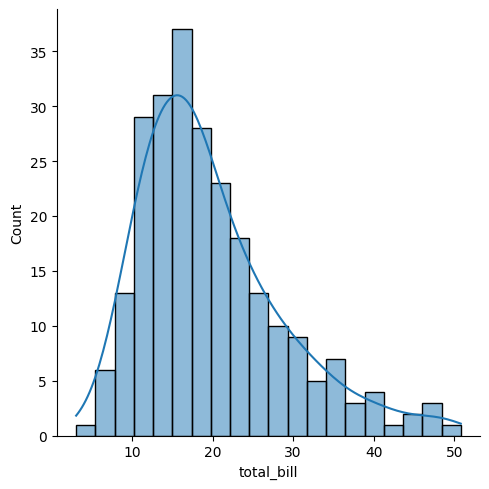

In [309]:
sns.displot(tips['total_bill'], kde=True, bins=20);

#### `jointplot`

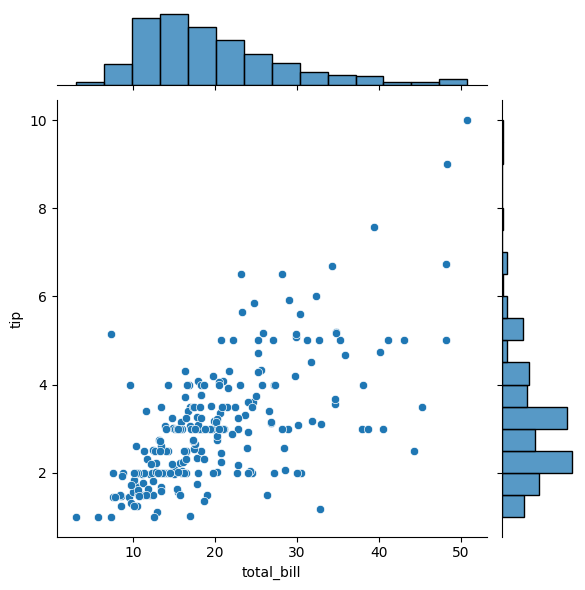

In [312]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter');

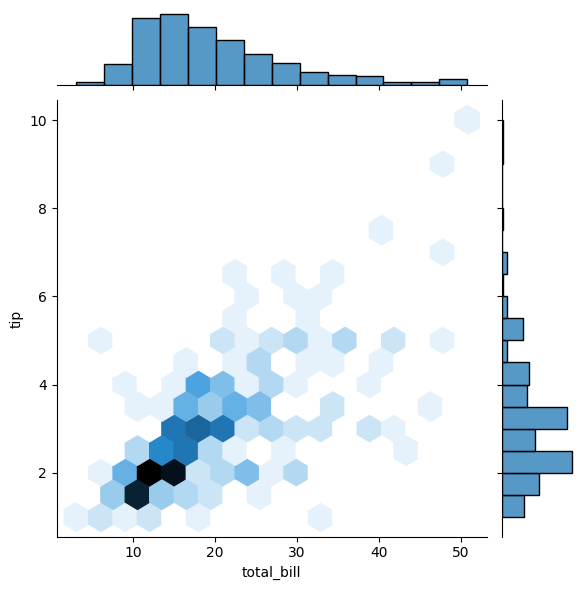

In [317]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

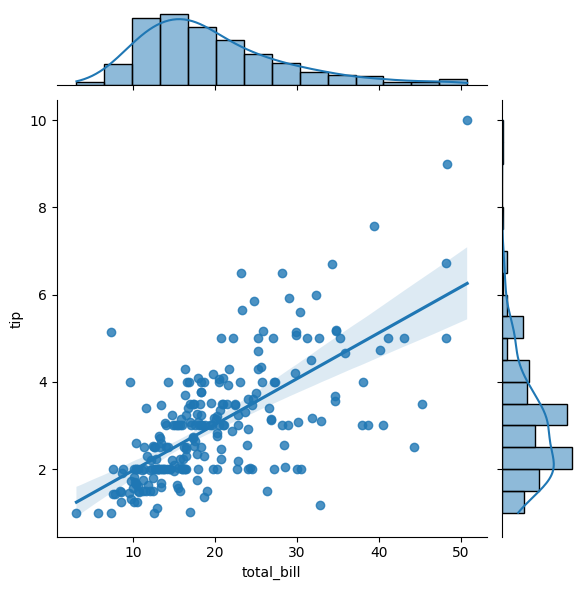

In [315]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

### Визуализация распределений между парами переменных

#### pairplot

Для визуализации относительных распределений между парами переменных

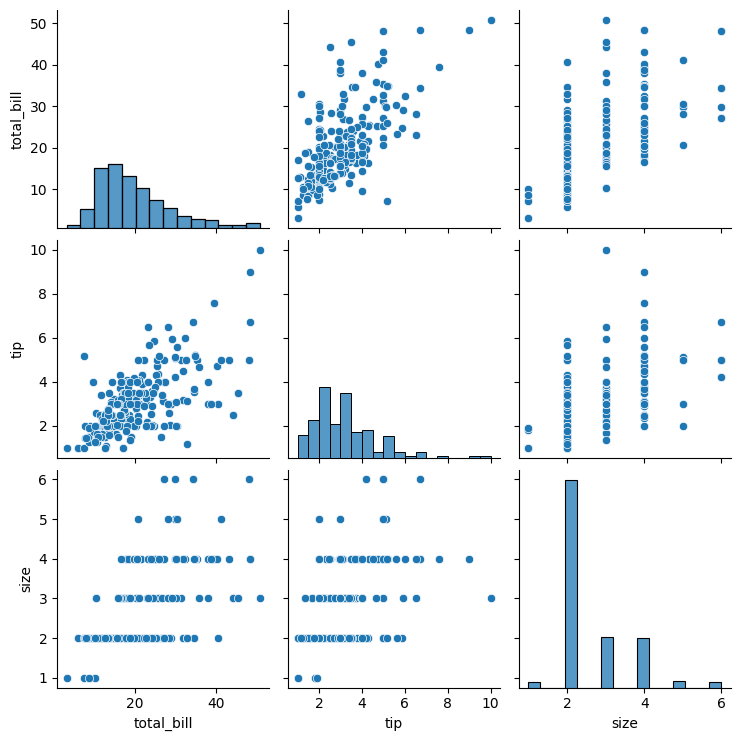

In [320]:
sns.pairplot(tips);

### Визуализации категориальных данных

*  factorplot
*  boxplot
*  violinplot
*  stripplot
*  swarmplot
*  barplot
*  countplot

![интерквартильный размах](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

#### `barplot`

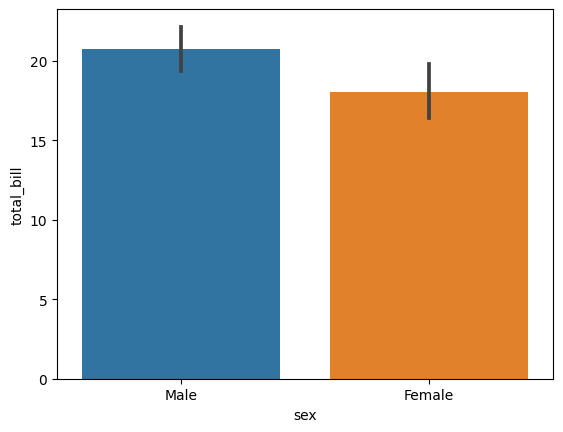

In [322]:
sns.barplot(x='sex', y='total_bill', data=tips);

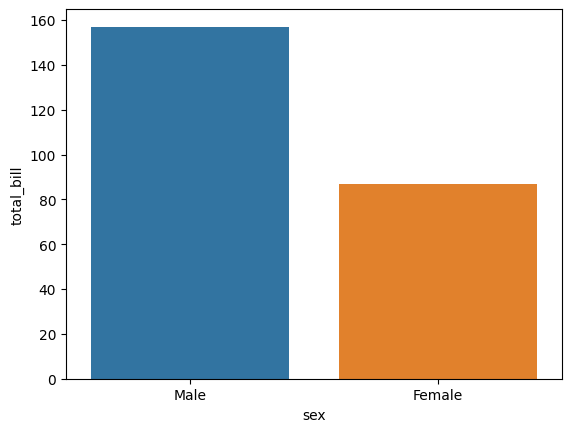

In [325]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=len);

#### `countplot`

того же самого можем добиться, используя сразу функцию `countplot`

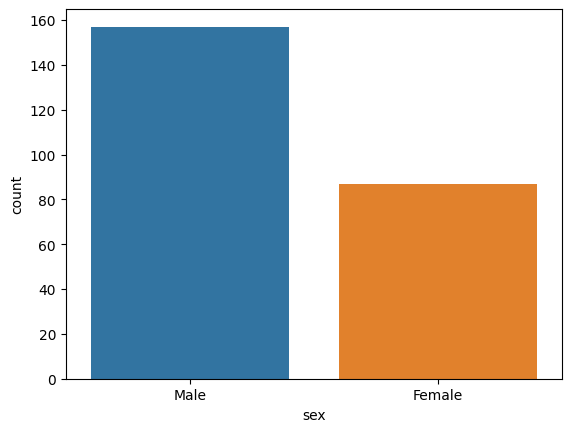

In [327]:
sns.countplot(x='sex', data=tips);

#### `boxplot`

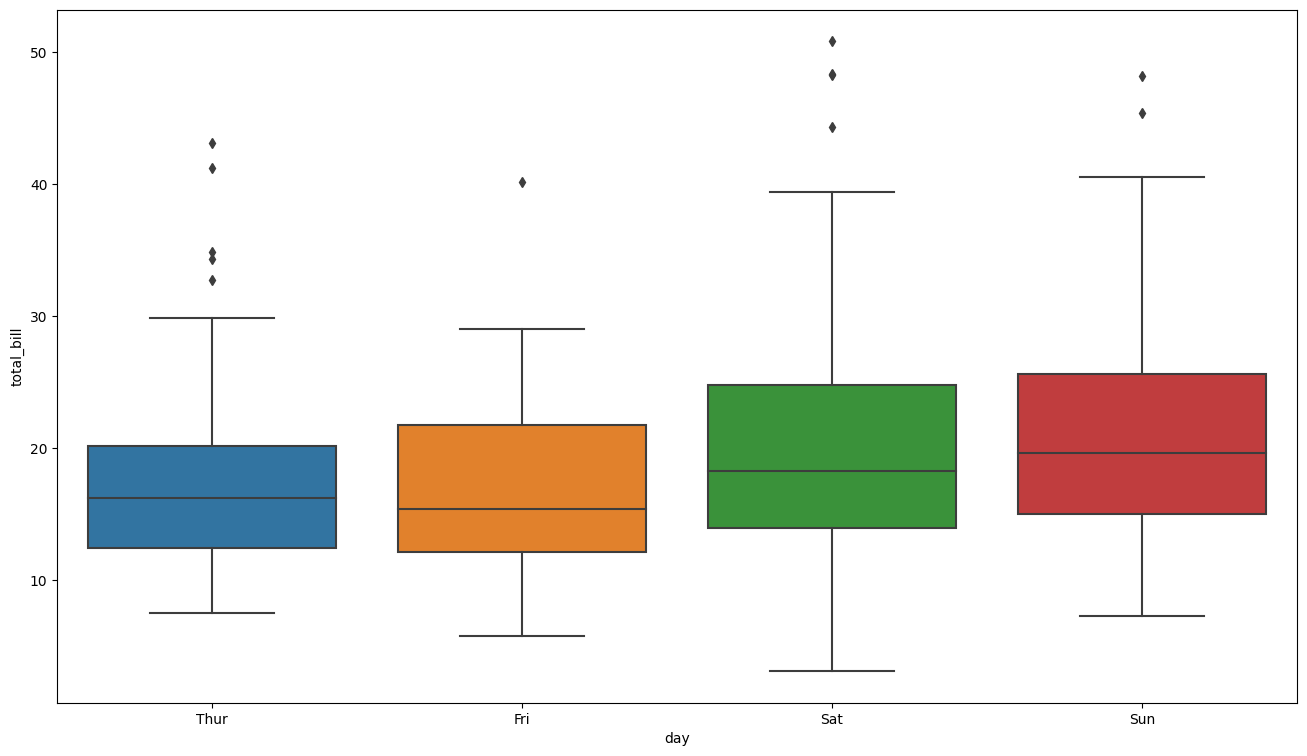

In [328]:
plt.figure(figsize=(16,9))
sns.boxplot(x='day', y='total_bill', data=tips);

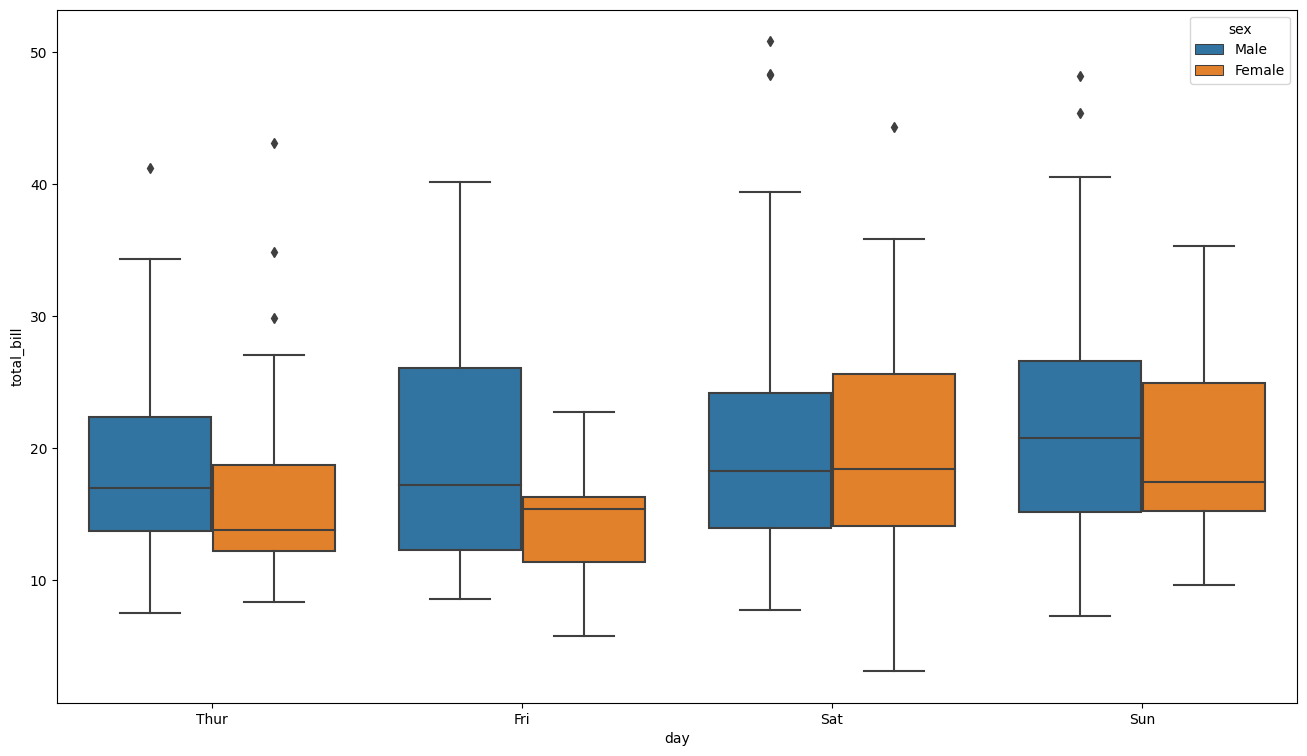

In [332]:
plt.figure(figsize=(16,9))
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex');

#### `violinplot`

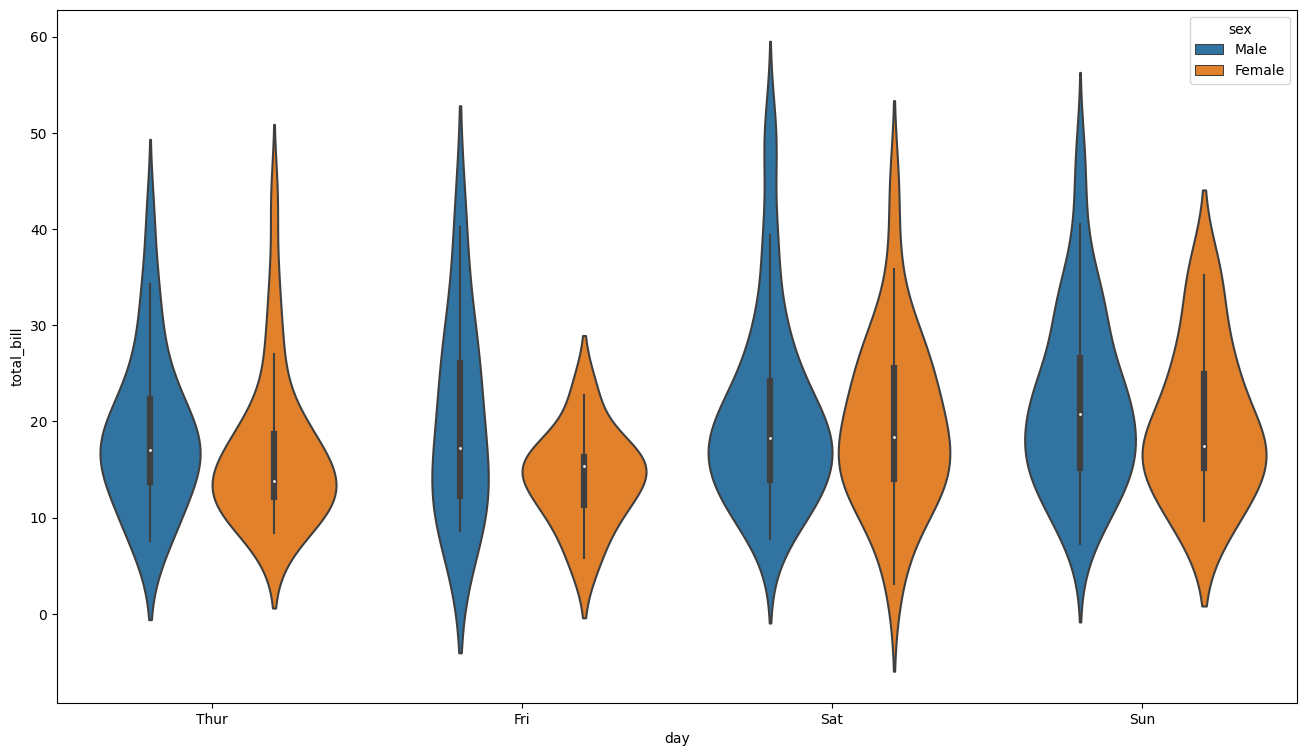

In [333]:
plt.figure(figsize=(16,9))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex');

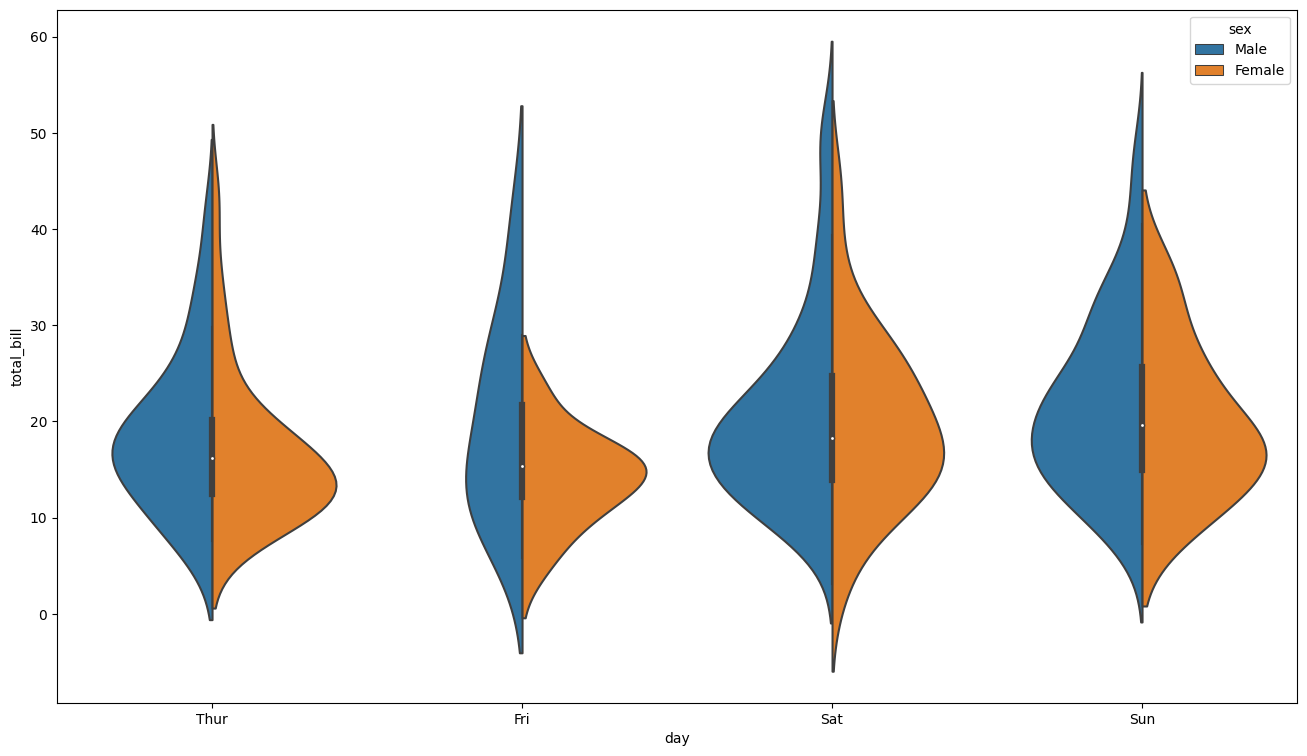

In [335]:
plt.figure(figsize=(16,9))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True);

## Итоги

Подведем итог того, что мы узнали

1. **Узнали:** О распределениях и их свойствах (математическом ожидании и дисперсии).  
    **Как будем использовать:** Будем проверять гипотезы, строить предположения об устойчивости наших результатов и искать выбросы.
2. **Узнали:** Об основных понятиях из статистике: выборка, характеристики распределений, статистики над данными.  
    **Как будем использовать:** Будем проверять наши результаты и строго формулировать утверждения.
3. **Узнали:** Как оценивать параметры распределений.  
    **Как будем использовать:** Будем выдвигать гипотезы о том, как распределены наши данные и проверять совпадают ли эти распределения для разных частей/групп.
4. **Узнали:** Как строить данные на двухмерных графиках.  
    **Как будем использовать:** Анализ данных предложенным способом может позволить увидеть структуры в данных, а также полезные закономерности и выбросы.